In [1]:
import sys
import seaborn as sns
print(sns.__version__)
print(sns.__file__)
import patchworklib as pw
penguins = sns.load_dataset("penguins")
diamonds = sns.load_dataset("diamonds")
import seaborn.objects as so

0.12.1
/usr/local/lib/python3.10/site-packages/seaborn/__init__.py


<Figure size 100x100 with 0 Axes>

In [2]:
g1 = pw.load_ngs(
        so.Plot(penguins, y="body_mass_g", color="species")
        .pair(x=["bill_length_mm", "bill_depth_mm"])
        .facet(row="sex")
        .add(so.Dots())
        .on(pw.basefigure)
        .plot()
    )

g2 = pw.load_ngs(
        so.Plot(penguins, x="body_mass_g")
        .facet(row="sex")
        .add(so.Bars(), so.Hist())
        .on(pw.basefigure)
        .plot()
    )

g3 = pw.load_ngs(
        so.Plot(diamonds, x="carat", y="price", color="clarity", pointsize="carat")
        .add(so.Dots())
        .scale(color=("#88c", "#555"), pointsize=(2, 10))
        .on(pw.basefigure)
        .plot(), figsize=(4,4)
    ) 

g4 = pw.load_ngs(
        so.Plot(penguins, x="body_mass_g", y="species", color="island")
        .facet(col="sex")
        .add(so.Dot(), so.Jitter(.5))
        .share(x=False)
        .limit(y=(2.5, -.5))
        .label(
            x="Body mass (g)", y="",
            color=str.capitalize,
            title="{} penguins".format,)
        .on(pw.basefigure)
        .plot(), figsize=(4,4)
    )

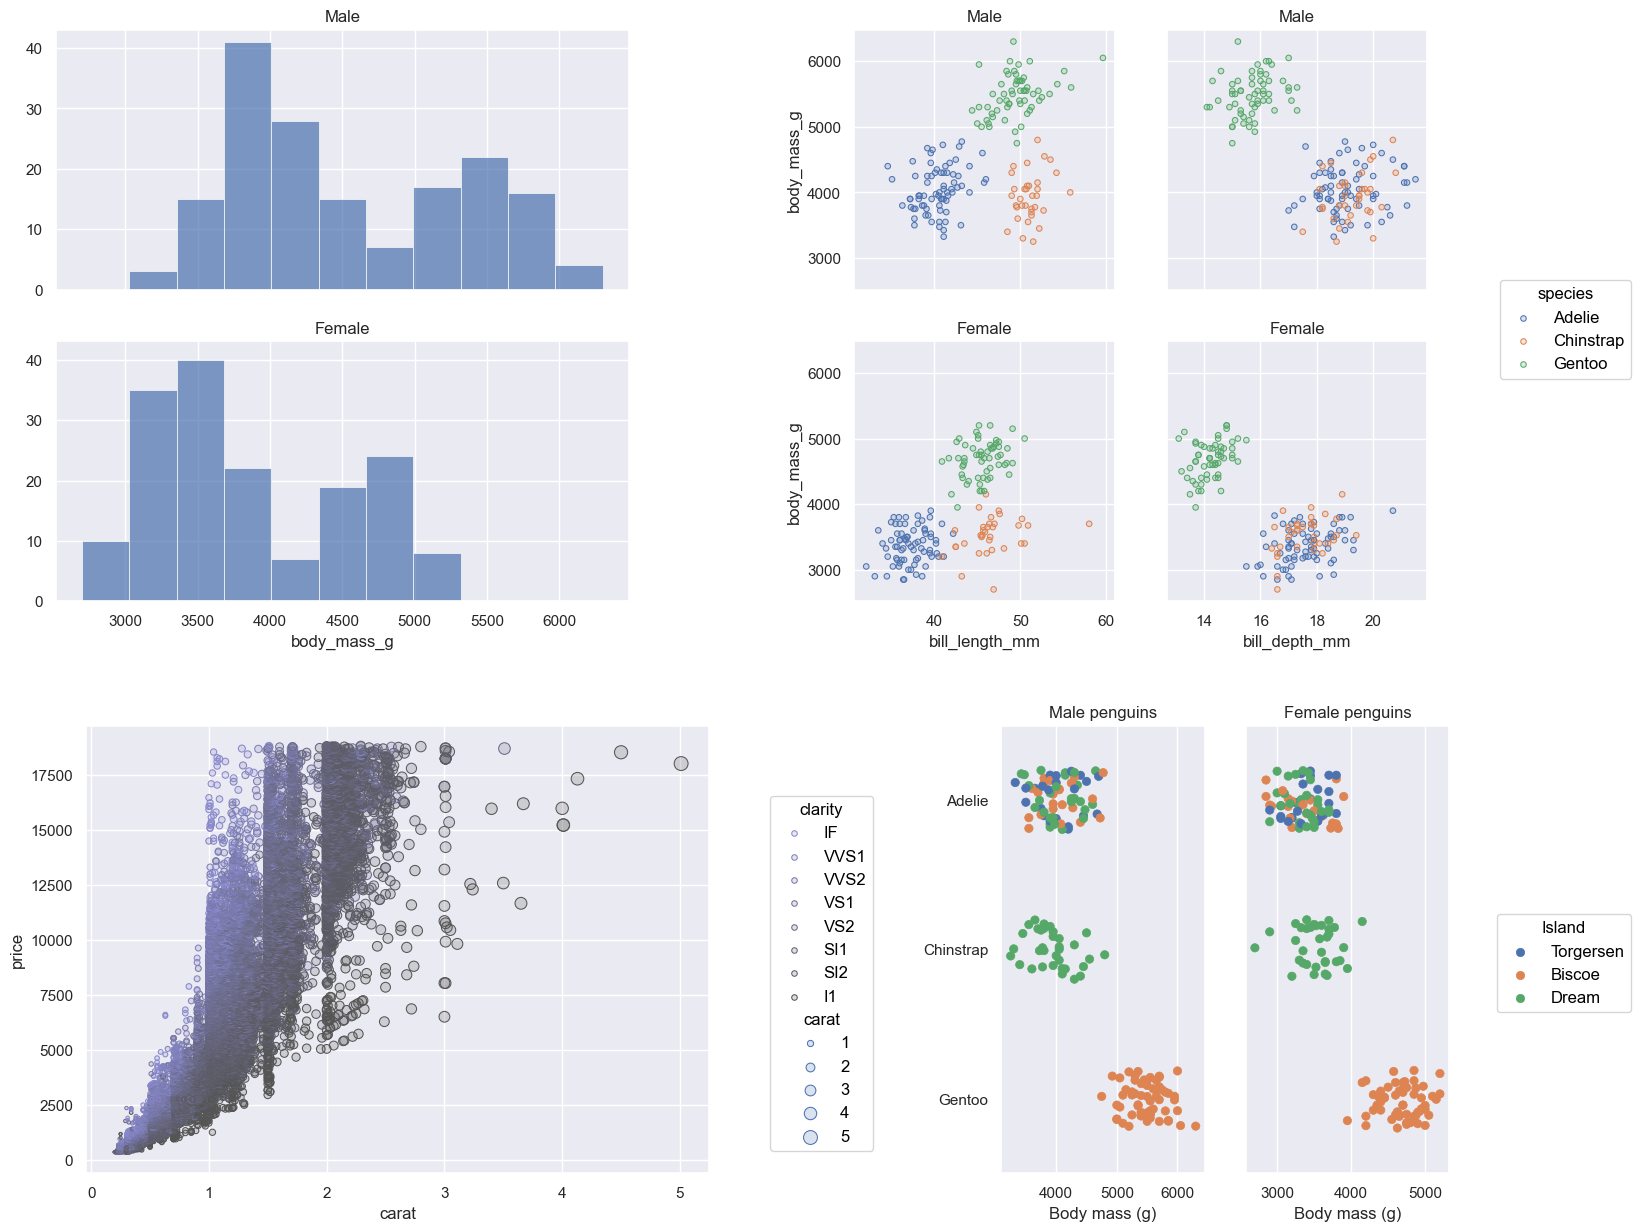

In [3]:
((g2|g1).outline/(g3|g4).outline).savefig()